In [56]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as st
import squarify
import matplotlib
from scipy.stats import linregress



In [73]:
coolness_data = "/Users/iqraimam/Desktop/SongAttributesVSPopularity/Resources/coolness.csv"
coolness = pd.read_csv(coolness_data)
coolness.head(10)

,Unnamed: 0,artist_names,track_name,weeks_on_chart,rank,streams,WOC_ratio,rank_pts,streams_ratio,Popularity_Score
0,8862,Tulus,Hati-Hati di Jalan,19,9.0,4026918.0,0.066,0.955,1.000,0.673667
1,4292,Henrique & Juliano,A Maior Saudade - Ao Vivo,45,19.0,3549891.0,0.155,0.905,0.882,0.647333
2,12506,João Gomes,Dengo,10,20.0,4025622.0,0.034,0.900,1.000,0.644667
3,13642,Keisya Levronka,Tak Ingin Usai,8,3.0,3624225.0,0.028,0.985,0.900,0.637667
4,12269,Jorge & Mateus,Todo Seu - Ao Vivo,10,18.0,3496942.0,0.034,0.910,0.868,0.604000
5,13330,"Rvfv, Kikimoteleba",Tigini (Remix),8,6.0,3227629.0,0.028,0.970,0.802,0.600000
6,40,Tulus,Monokrom,276,65.0,680832.0,0.952,0.675,0.169,0.598667
7,12,León Larregui,Brillas,290,100.0,979170.0,1.000,0.500,0.243,0.581000
8,73,Parokya Ni Edgar,Your Song,253,54.0,504827.0,0.872,0.730,0.125,0.575667
9,9687,"Leo Santana, Mc Don Juan, Mari Fernandez",Áudio Que Te Entrega - Faixa Bônus,16,19.0,3046483.0,0.055,0.905,0.757,0.572333


In [102]:
song_coolness = coolness.sort_values(by=['WOC_ratio'], ascending=False)
song_coolness.head(50)

,Unnamed: 0,artist_names,track_name,weeks_on_chart,rank,streams,WOC_ratio,rank_pts,streams_ratio,Popularity_Score
50,17,Payung Teduh,Untuk Perempuan Yang Sedang Di Pelukan,290,112.0,350486.0,1.000,0.440,0.087,0.509000
298,15,Terence Siufay,Shi Guang Ji,290,143.0,26863.0,1.000,0.285,0.007,0.430667
39,8,Danny Ocean,Me Rehúso,290,97.0,177402.0,1.000,0.515,0.044,0.519667
45,13,Kay Tse,囍帖街,290,94.0,36024.0,1.000,0.530,0.009,0.513000
56,5,Eric Chou,How Have You Been? - Ending Theme Song of TVBS...,290,100.0,58119.0,1.000,0.500,0.014,0.504667
404,10,Alejandro Fernández,Me Dediqué a Perderte,290,159.0,146012.0,1.000,0.205,0.036,0.413667
152,16,Luis Miguel,Ahora Te Puedes Marchar,290,141.0,364695.0,1.000,0.295,0.091,0.462000
17,7,The Killers,Mr. Brightside,290,97.0,591710.0,1.000,0.515,0.147,0.554000
75,1,Hebe Tien,小幸運,290,108.0,54015.0,1.000,0.460,0.013,0.491000
288,0,Ed Sheeran,Photograph,290,147.0,130715.0,1.000,0.265,0.032,0.432333


In [28]:
artists_df = coolness['artist_names'].value_counts().rename_axis('artist_names').reset_index(name='counts')
top_10_artists = artists_df.head(10)
top_10_artists

,artist_names,counts
0,BTS,96
1,Taylor Swift,74
2,Bad Bunny,49
3,Abyusif,35
4,Måneskin,34
5,Marília Mendonça,33
6,Kanye West,32
7,NCT DREAM,31
8,Marwan Moussa,30
9,LFERDA,30


In [79]:
top_10_artists.rename(columns = {'artist_names':'Artist Names'}, inplace = True)
top_10_artists

,Artist Names,counts
0,BTS,96
1,Taylor Swift,74
2,Bad Bunny,49
3,Abyusif,35
4,Måneskin,34
5,Marília Mendonça,33
6,Kanye West,32
7,NCT DREAM,31
8,Marwan Moussa,30
9,LFERDA,30


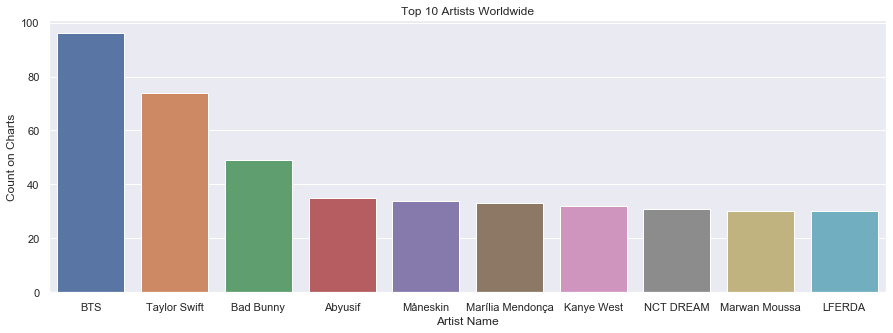

In [89]:
plt.figure(figsize=(15,5))
sns.set_color_codes("muted")
sns.barplot(x="Artist Names", y="counts", data = top_10_artists)
plt.title('Top 10 Artists Worldwide')
plt.xlabel('Artist Name')
plt.ylabel('Count on Charts')
plt.savefig("/Users/iqraimam/Desktop/SongAttributesVSPopularity/artist_popularity.png")

In [44]:
all_countries_data = "/Users/iqraimam/Desktop/SongAttributesVSPopularity/Resources/all_countries_top_fifty.csv"
explore_countries = pd.read_csv(all_countries_data)
explore_countries.head()

,Unnamed: 0,artist_names,track_name,Popularity_Score,WOC_ratio,rank_pts,streams_ratio,streams,rank,weeks_on_chart,danceability,energy,loudness,speechiness,acousticness,valence,tempo,duration,country
0,0,"Bizarrap, Quevedo","Quevedo: Bzrp Music Sessions, Vol. 52",0.626333,0.014,0.865000,1.000,3357665.500,27.000,2,0.621,0.782,-5.548,0.044,0.012,0.550,128.033,199.0,Argentina
1,1,"TINI, Maria Becerra",Miénteme,0.602362,0.429,0.892085,0.486,1631911.556,21.583,63,0.850,0.541,-4.522,0.067,0.161,0.916,92.003,165.0,Argentina
2,2,"Bad Bunny, Bomba Estéreo",Ojitos Lindos,0.585112,0.068,0.983335,0.704,2365299.333,3.333,10,0.647,0.686,-5.745,0.041,0.080,0.268,79.928,258.0,Argentina
3,3,"Bad Bunny, Chencho Corleone",Me Porto Bonito,0.578778,0.068,0.978335,0.690,2315401.667,4.333,10,0.911,0.712,-5.105,0.082,0.090,0.425,92.005,179.0,Argentina
4,4,"TINI, L-Gante",Bar,0.572930,0.238,0.905790,0.575,1929734.263,18.842,35,0.523,0.691,-3.802,0.083,0.133,0.677,94.148,160.0,Argentina


In [103]:
countries = explore_countries.drop(columns=['Unnamed: 0','artist_names', 'track_name'])
countries.head()

,Popularity_Score,WOC_ratio,rank_pts,streams_ratio,streams,rank,weeks_on_chart,danceability,energy,loudness,speechiness,acousticness,valence,tempo,duration,country
0,0.626333,0.014,0.865000,1.000,3357665.500,27.000,2,0.621,0.782,-5.548,0.044,0.012,0.550,128.033,199.0,Argentina
1,0.602362,0.429,0.892085,0.486,1631911.556,21.583,63,0.850,0.541,-4.522,0.067,0.161,0.916,92.003,165.0,Argentina
2,0.585112,0.068,0.983335,0.704,2365299.333,3.333,10,0.647,0.686,-5.745,0.041,0.080,0.268,79.928,258.0,Argentina
3,0.578778,0.068,0.978335,0.690,2315401.667,4.333,10,0.911,0.712,-5.105,0.082,0.090,0.425,92.005,179.0,Argentina
4,0.572930,0.238,0.905790,0.575,1929734.263,18.842,35,0.523,0.691,-3.802,0.083,0.133,0.677,94.148,160.0,Argentina


In [105]:
avg_countries_data = countries.groupby(["country"]).mean().head(100)
avg_countries_data.head()

,Popularity_Score,WOC_ratio,rank_pts,streams_ratio,streams,rank,weeks_on_chart,danceability,energy,loudness,speechiness,acousticness,valence,tempo,duration
country,,,,,,,,,,,,,,,
Argentina,0.482654,0.27094,0.800482,0.37654,1.264207e+06,39.90356,39.82,0.75114,0.66602,-4.95862,0.12698,0.22660,0.64350,116.48172,208.90484
Australia,0.499473,0.30230,0.819780,0.37634,7.631215e+05,36.04408,87.08,0.63260,0.63302,-6.28266,0.08792,0.29610,0.50388,119.82290,207.96000
Austria,0.487741,0.13128,0.878963,0.45298,1.579826e+05,24.20736,37.80,0.65348,0.68236,-6.72938,0.09614,0.25164,0.62084,133.71012,191.90000
Belarus,0.685883,0.93822,0.823269,0.29616,2.457339e+04,35.34622,20.64,0.67446,0.67596,-6.98256,0.10560,0.18902,0.43480,123.76652,172.10000
Belgium,0.514896,0.27064,0.797367,0.47668,1.939534e+05,40.52654,67.66,0.68258,0.65548,-6.37120,0.08552,0.25022,0.55434,126.81276,196.54000


In [50]:
genre_data = "/Users/iqraimam/Desktop/SongAttributesVSPopularity/Resources/top_fifty_genres.csv"
genres = pd.read_csv(genre_data)
genres.head()

,Unnamed: 0,artist_genre,artist_names
0,0,pop,107610
1,1,trap latino,40392
2,2,latin,34474
3,3,reggaeton,33662
4,4,dance pop,31377


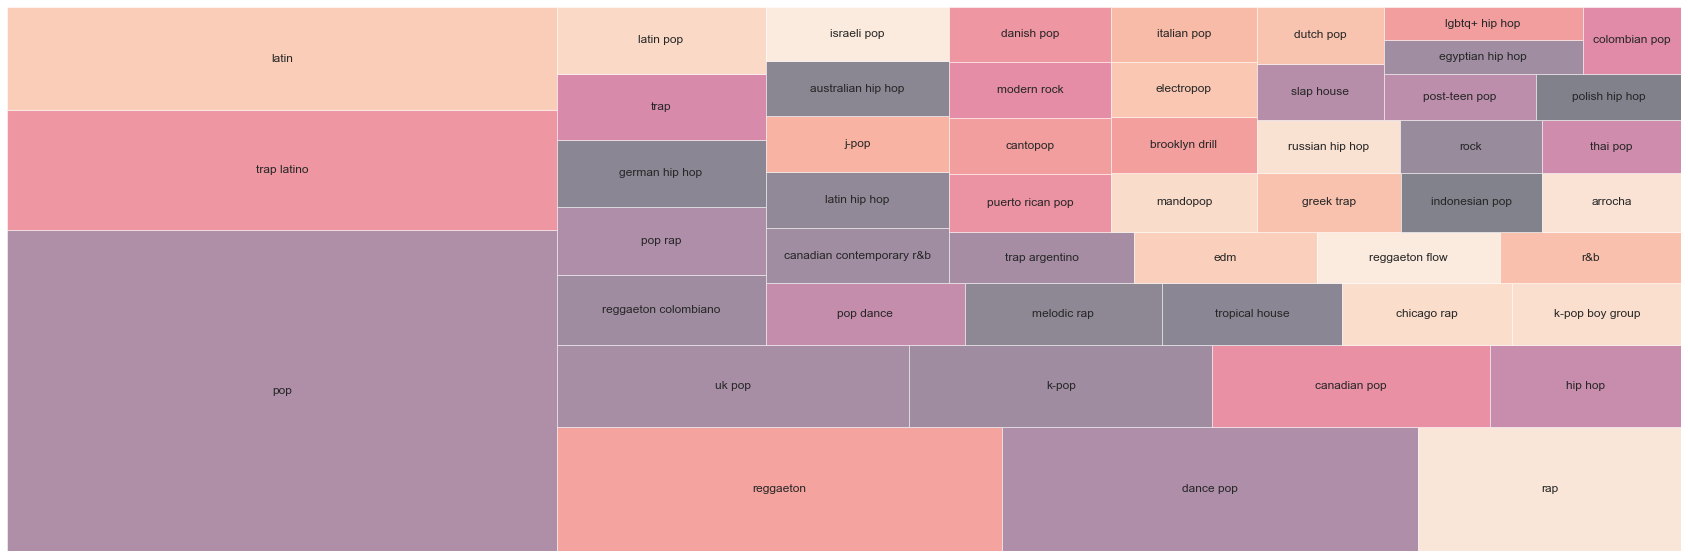

In [91]:

plt.figure(figsize=(30,10))
squarify.plot(sizes=genres['artist_names'],label=genres['artist_genre'], alpha=.5 )
plt.axis('off')
plt.savefig("treemaps.png")
plt.show()

In [63]:
country_attributes_data = "/Users/iqraimam/Desktop/SongAttributesVSPopularity/Resources/country_attributes.csv"
country_attributes = pd.read_csv(country_attributes_data)
country_attributes.head()

,Unnamed: 0,country,danceability,energy,loudness,speechiness,acousticness,valence,tempo,duration
0,0,Argentina,0.744013,0.675101,-5.216302,0.131787,0.229910,0.646563,120.360768,206.661807
1,1,Australia,0.647711,0.633686,-6.481121,0.095834,0.254743,0.504944,120.494618,210.157895
2,2,Austria,0.690939,0.671089,-6.318950,0.111944,0.213600,0.532730,123.415775,187.416711
3,3,Belarus,0.685134,0.656724,-7.133241,0.125515,0.213192,0.455123,124.346252,171.488864
4,4,Belgium,0.696079,0.677366,-6.198538,0.108677,0.218400,0.549937,122.500907,197.808202


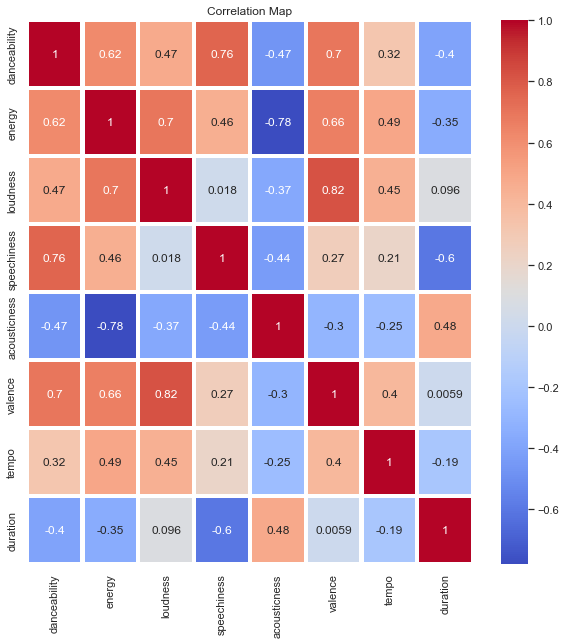

In [85]:
plt.figure(figsize=(10,10))
plt.title('Correlation Map')
ax=sns.heatmap(country_attributes.corr(),
               linewidth=3.1,
               annot=True,
               cmap="coolwarm")
plt.savefig("/Users/iqraimam/Desktop/SongAttributesVSPopularity/heatmap.png")